In [20]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision.transforms as T
import webdataset as wds


BASE_URL = './demo_data/'

NORM_MEAN = [0.485, 0.456, 0.406]
NORM_STD  = [0.229, 0.224, 0.225]


def make_transform(mode):
    if mode == "train":
        return T.Compose(
            [
                # T.Normalize(NORM_MEAN, NORM_STD)
            ]
        )
    elif mode == "test":
        return T.Compose(
            [
                # T.Normalize(NORM_MEAN, NORM_STD)
            ]
        )


def show_tensor(ims):
    plt.figure(figsize=(12,12))
    f, axarr = plt.subplots(len(ims), 1)
    if len(ims) == 1: axarr = [axarr]
    for im, ax in zip(ims, axarr):
        im = np.array(torch.squeeze(im).permute(1, 2, 0))
        im = im/np.amax(im)
        ax.imshow(im)

torch.Size([1, 3, 224, 224])
torch.Size([1])


<Figure size 864x864 with 0 Axes>

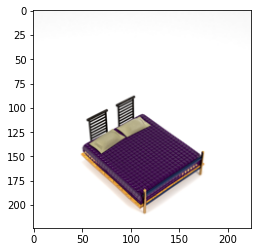

In [21]:
"""
2D Shape classification dataloader demo.
"""
from compatloaders import Compat2DShapeLoader

test_loader = (
    Compat2DShapeLoader(root_url=BASE_URL, split="test", n_comp=2, transform=make_transform("test"))
    .make_loader(batch_size=1, num_workers=1)
)

for image, target in test_loader:
    if image.shape[0] == 1:
        show_tensor([image])
    print(image.shape)
    print(target.shape)
    break

[{'back': 20, 'armrest': 40, 'seat': 60, 'pillow': 80, 'leg': 100, 'base': 120, 'backrest': 140}]


<Figure size 864x864 with 0 Axes>

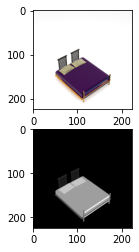

In [22]:
"""
2D Shape segmentation dataloader demo.
"""
from compatloaders import Compat2DSegLoader

test_loader = (
    Compat2DSegLoader(root_url=BASE_URL, split="test", n_comp=2, transform=make_transform("test"))
    .make_loader(batch_size=1, num_workers=1)
)

for image, target, mask, mask_code in test_loader:
    if image.shape[0] == 1:
        show_tensor([image, mask])
    print(mask_code)
    break
